In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
#Data cleaning and preparation 

In [ ]:
#Loading the data 

In [2]:
df=pd.read_csv("zomato_restaurants_in_India.csv")

In [ ]:
# Display the first few rows and basic information about the dataset


In [8]:
df.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [7]:
df.describe(include='all')  # Describe all columns, even non-numeric ones

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944,211944,211944,211810,211944,211944.000000,211944,211944.000000,211944.000000,...,211944.000000,211944,211944,211944.000000,211944,211944.000000,211944.000000,211896.0,211944.000000,211944.0
unique,NaN,41100,27,55568,50657,99,NaN,3731,NaN,NaN,...,NaN,1,31455,NaN,39,NaN,NaN,NaN,NaN,NaN
top,NaN,Domino's Pizza,['Quick Bites'],https://www.zomato.com/chennai/3bs-buddies-bar...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,NaN,Civil Lines,NaN,NaN,...,NaN,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",NaN,Very Good,NaN,NaN,NaN,NaN,NaN
freq,NaN,3108,64390,169,299,11630,NaN,3660,NaN,NaN,...,NaN,211944,3352,NaN,65451,NaN,NaN,NaN,NaN,NaN
mean,1.349411e+07,NaN,NaN,NaN,NaN,NaN,4746.785434,NaN,21.499758,77.615276,...,1.882535,NaN,NaN,3.395937,NaN,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,NaN,NaN,NaN,NaN,NaN,5568.766386,NaN,22.781331,7.500104,...,0.892989,NaN,NaN,1.283642,NaN,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,...,1.000000,NaN,NaN,0.000000,NaN,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,15.496071,74.877961,...,1.000000,NaN,NaN,3.300000,NaN,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,22.514494,77.425971,...,2.000000,NaN,NaN,3.800000,NaN,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,NaN,NaN,NaN,NaN,NaN,11306.000000,NaN,26.841667,80.219323,...,2.000000,NaN,NaN,4.100000,NaN,362.000000,128.000000,0.0,1.000000,-1.0


In [ ]:
#Checking missing values 

In [14]:
mising_values= df.isnull().sum()

In [15]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [ ]:
# Check for duplicate records

In [8]:
df.duplicated().sum()

151527

In [17]:
#Handling missing values 

In [ ]:
# Dropping the 'zipcode' column as it has a large number of missing values

In [18]:
df.drop(columns=['zipcode'])

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [ ]:
# Handling missing values for 'address', 'cuisines', 'timings', and 'opentable_support'
# Filling missing 'address' with 'Unknown', 'cuisines' with 'Not Specified', 'timings' with 'Not Available'

In [20]:
 df['address'].fillna('Unknown')
  

0         Kalyani Point, Near Tulsi Cinema, Bypass Road,...
1               Main Market, Sadar Bazaar, Agra Cantt, Agra
2         62/1, Near Easy Day, West Shivaji Nagar, Goalp...
3         Near Anjana Cinema, Nehru Nagar, Civil Lines, ...
4               1C,3rd Floor, Fatehabad Road, Tajganj, Agra
                                ...                        
211939    Manu Smriti Complex, Near Navrachna School, GI...
211940    Mahalaxmi Apartment, Opposite B O B, Karoli Ba...
211941    3rd Floor, Shreem Shalini Mall, Opposite Conqu...
211942    G-2, Vedant Platina, Near Cosmos, Akota, Vadodara
211943    Shop 7, Ground Floor, Opposite Natubhai Circle...
Name: address, Length: 211944, dtype: object

In [21]:
df['cuisines'].fillna('Not Specified')

0         North Indian, South Indian, Mithai, Street Foo...
1         North Indian, Mughlai, Rolls, Chinese, Fast Fo...
2                                         Fast Food, Mithai
3                 Desserts, Bakery, Fast Food, South Indian
4                        North Indian, Continental, Italian
                                ...                        
211939                                         North Indian
211940                                            Fast Food
211941                      Gujarati, North Indian, Chinese
211942                           Fast Food, Sandwich, Salad
211943                           Cafe, Healthy Food, Coffee
Name: cuisines, Length: 211944, dtype: object

In [22]:
df['timings'].fillna('Not Available')


0                                8:30am – 10:30pm (Mon-Sun)
1         12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...
2                                          9:30 AM to 11 PM
3                                      8am – 11pm (Mon-Sun)
4                                      11:30 AM to 11:30 PM
                                ...                        
211939                  11am – 3pm, 7pm – 11:30pm (Mon-Sun)
211940    4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...
211941                11:30 AM to 3:30 PM, 7:30 PM to 11 PM
211942                                         8 AM to 1 AM
211943                                 7am – 11pm (Mon-Sun)
Name: timings, Length: 211944, dtype: object

In [ ]:
# Filling missing 'opentable_support' with 0 (assuming no support) and converting to integer

In [23]:
df['opentable_support'].fillna(0).astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
211939    0
211940    0
211941    0
211942    0
211943    0
Name: opentable_support, Length: 211944, dtype: int32

In [ ]:
#Exploratory Data Analysis

In [ ]:
#Descriptive Statistics for numeric variables 

In [24]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [ ]:
#Distribution Analysis for catogorical varibles 

In [25]:
df['price_range'].value_counts()


price_range
1    85831
2    77762
3    35767
4    12584
Name: count, dtype: int64

In [26]:

df['rating_text'].value_counts()

rating_text
Very Good        65451
Good             63384
Average          42157
Not rated        23478
Excellent        15737
Poor              1175
Çok iyi             56
Sangat Baik         44
Muito Bom           44
Excelente           42
Muy Bueno           35
Bardzo dobrze       31
Bom                 26
Skvělé              25
Baik                24
Velmi dobré         22
Harika              22
İyi                 19
Ottimo              18
Veľmi dobré         17
Terbaik             16
Buono               14
Skvělá volba        13
Dobré               12
Bueno               11
Dobrze               9
Wybitnie             8
Eccellente           8
Vynikajúce           7
Průměr               6
Muito bom            6
Média                5
Promedio             5
Scarso               3
Ortalama             3
Średnio              3
Priemer              3
Media                3
Biasa                2
Name: count, dtype: int64

In [ ]:
#Viuslaization of distribution of variables 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the style for visualization

In [11]:
sns.set(style="whitegrid")

In [ ]:
# Visualize the distribution of aggregate ratings

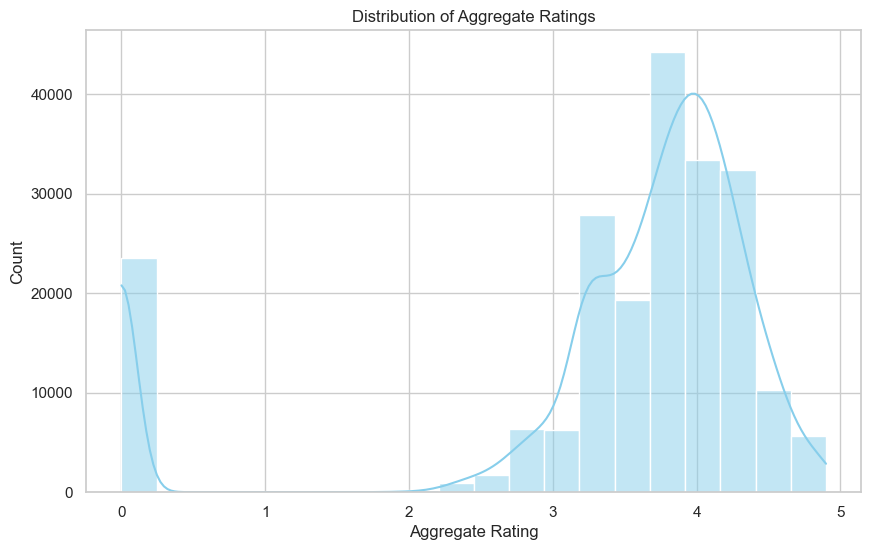

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="aggregate_rating", bins=20, kde=True, color='skyblue')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
# Visualize the distribution of price range

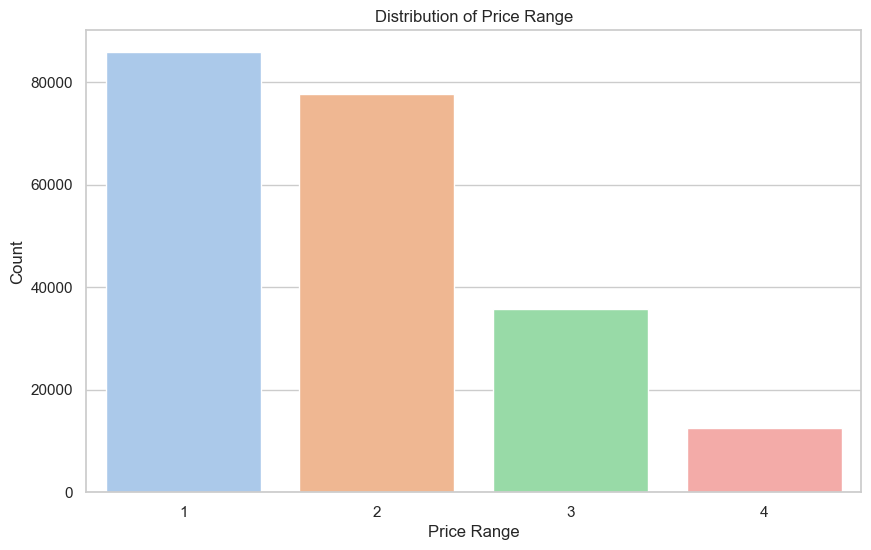

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="price_range", palette='pastel')
plt.title("Distribution of Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

In [ ]:
# Visualize the count of various cuisines

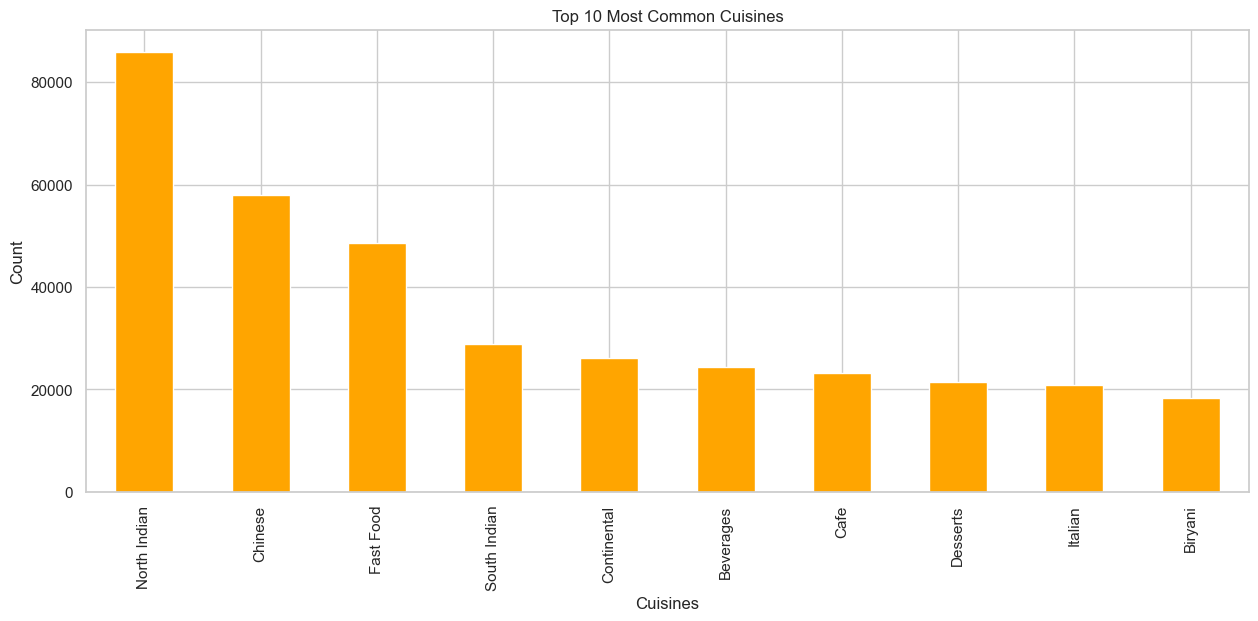

In [14]:
plt.figure(figsize=(15, 6))
df['cuisines'].str.split(', ').explode().value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Cuisines")
plt.ylabel("Count")
plt.show()

In [ ]:
#Correlation Analysis

In [ ]:
# Calculate the correlation matrix

In [18]:
correlation_matrix = df[['aggregate_rating', 'average_cost_for_two', 'votes', 'photo_count']].corr()

In [19]:
df[['aggregate_rating', 'average_cost_for_two', 'votes', 'photo_count']].corr()

,aggregate_rating,average_cost_for_two,votes,photo_count
aggregate_rating,1.000000,0.232347,0.271953,0.218522
average_cost_for_two,0.232347,1.000000,0.269050,0.341905
votes,0.271953,0.269050,1.000000,0.654966
photo_count,0.218522,0.341905,0.654966,1.000000


In [ ]:
# Plotting the correlation matrix

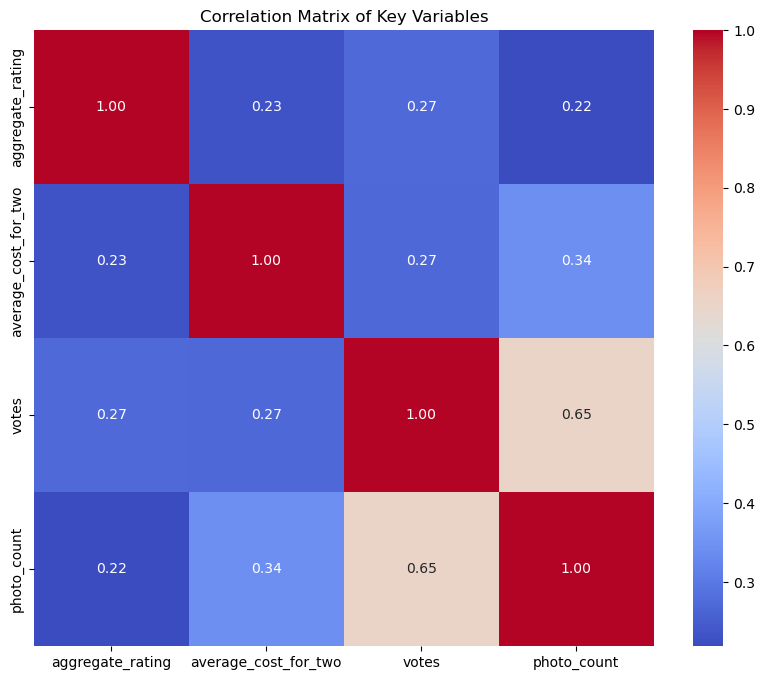

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Key Variables')
plt.show()

In [ ]:
#Regional Analysis

In [ ]:
# We'll perform a regional analysis by examining restaurant trends across different cities
# Aggregating data by 'city' to see the number of restaurants, average ratings, and average cost


In [ ]:
# Group data by city to compare the number of restaurants

In [17]:
city_restaurant_count = df.groupby('city').size().sort_values(ascending=False)


In [18]:
print(city_restaurant_count)

city
Chennai          11630
Mumbai            6497
Bangalore         4971
Pune              4217
Lucknow           4121
                 ...  
Ghaziabad          132
Faridabad          124
Howrah              66
Greater Noida       33
Nayagaon            17
Length: 99, dtype: int64


In [ ]:
# Create a bar plot for the number of restaurants by city

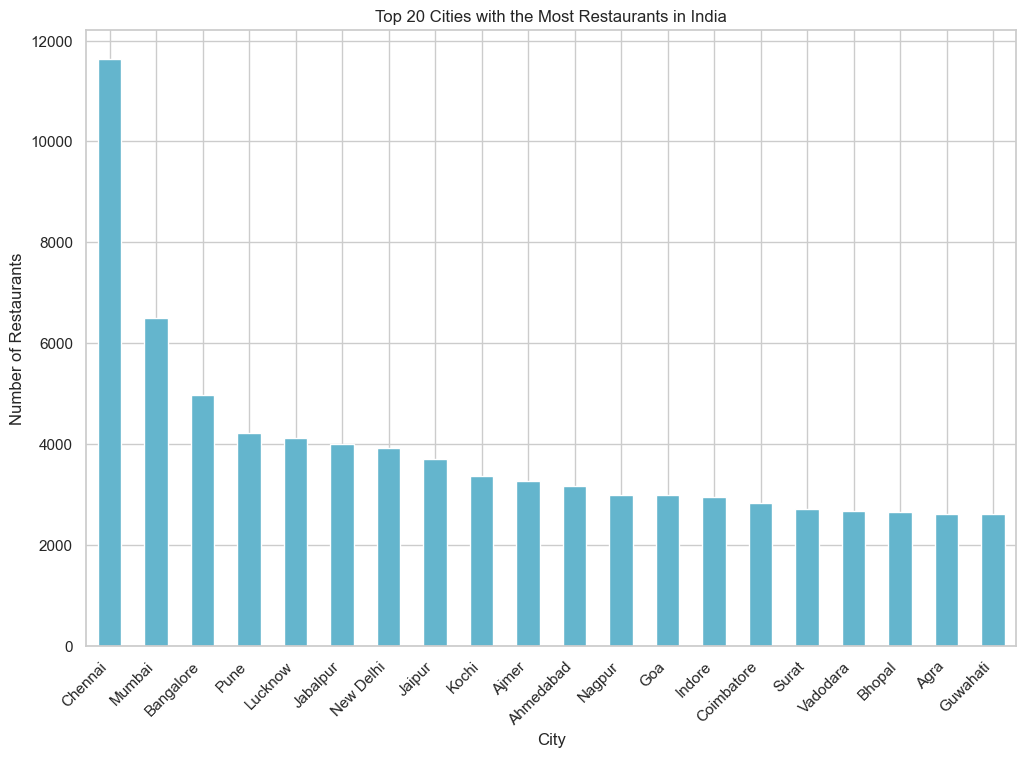

In [19]:
plt.figure(figsize=(12, 8))
city_restaurant_count.head(20).plot(kind='bar', color='c')
plt.title("Top 20 Cities with the Most Restaurants in India")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45, ha='right')
plt.show()  # Display the plot

In [ ]:
# Analyze popular cuisines by city

In [20]:
city_cuisine_series = df.groupby('city')['cuisines'].apply(lambda x: ', '.join(x.dropna()))

In [21]:
print(city_cuisine_series)

city
Agra          North Indian, South Indian, Mithai, Street Foo...
Ahmedabad     North Indian, Chinese, Fast Food, Continental,...
Ajmer         Continental, Beverages, South Indian, Fast Foo...
Alappuzha     South Indian, Kerala, South Indian, Kerala, Be...
Allahabad     North Indian, Burger, Fast Food, Bakery, Itali...
                                    ...                        
Varanasi      South Indian, Fast Food, Italian, Pizza, Chine...
Vellore       Chinese, South Indian, BBQ, Italian, Chettinad...
Vijayawada    Biryani, North Indian, South Indian, Chinese, ...
Vizag         Biryani, Seafood, North Indian, Hyderabadi, Mu...
Zirakpur      Cafe, Continental, Burger, Sandwich, Beverages...
Name: cuisines, Length: 99, dtype: object


In [ ]:
# Split and count unique cuisines per city

In [22]:
city_cuisine_count = city_cuisine_series.str.split(',').apply(lambda x: pd.Series(x).value_counts())


In [23]:
print(city_cuisine_count)

             North Indian   Fast Food   Chinese   South Indian   Continental  \
city                                                                           
Agra               1312.0       748.0     689.0          397.0         372.0   
Ahmedabad          1111.0       761.0     523.0          178.0         365.0   
Ajmer              1846.0      1396.0     986.0          395.0         144.0   
Alappuzha           365.0       197.0     197.0          798.0         171.0   
Allahabad          1104.0       534.0     596.0          311.0         237.0   
...                   ...         ...       ...            ...           ...   
Varanasi           1311.0       545.0     876.0          333.0         341.0   
Vellore             608.0       445.0     691.0          750.0          46.0   
Vijayawada         1068.0       345.0    1060.0          771.0         131.0   
Vizag               985.0       358.0     854.0          504.0         256.0   
Zirakpur            122.0        75.0   

In [ ]:
# Get the most popular cuisine per city

In [24]:
most_popular_cuisine_per_city = city_cuisine_count.idxmax(axis=1)


In [25]:
print(most_popular_cuisine_per_city)

city
Agra           North Indian
Ahmedabad      North Indian
Ajmer          North Indian
Alappuzha      South Indian
Allahabad      North Indian
                  ...      
Varanasi       North Indian
Vellore        South Indian
Vijayawada     North Indian
Vizag          North Indian
Zirakpur       North Indian
Length: 99, dtype: object


In [ ]:
# Create a bar plot for the most popular cuisine in each city


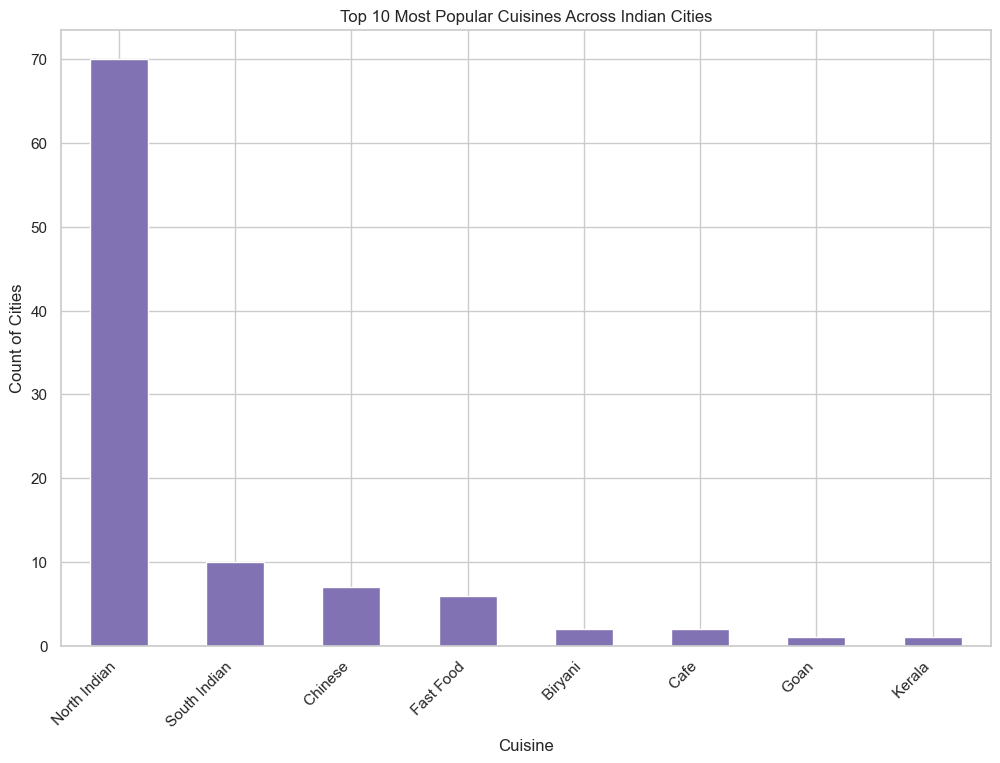

In [26]:
plt.figure(figsize=(12, 8))
most_popular_cuisine_per_city.value_counts().head(10).plot(kind='bar', color='m')
plt.title("Top 10 Most Popular Cuisines Across Indian Cities")
plt.xlabel("Cuisine")
plt.ylabel("Count of Cities")
plt.xticks(rotation=45, ha='right')
plt.show()  # Display the plot

In [ ]:
# Group data by city and calculate average ratings and price range

In [27]:
city_rating_price = df.groupby('city').agg(
    avg_rating=('aggregate_rating', 'mean'),
    avg_price_range=('price_range', 'mean')
).sort_values(by='avg_rating', ascending=False)



In [28]:
print(city_rating_price)

              avg_rating  avg_price_range
city                                     
Bangalore       4.073567         2.307986
Gurgaon         4.048837         2.586047
Hyderabad       4.042747         2.208570
Secunderabad    4.018579         1.754098
Mumbai          4.004848         2.557488
...                  ...              ...
Pushkar         1.249174         1.712555
Darjeeling      1.141116         1.671886
Kharagpur       0.963740         1.196947
Alappuzha       0.858842         1.559979
Palakkad        0.785235         1.522880

[99 rows x 2 columns]


In [ ]:
# Create a scatter plot to visualize the relationship between ratings and price range in different cities

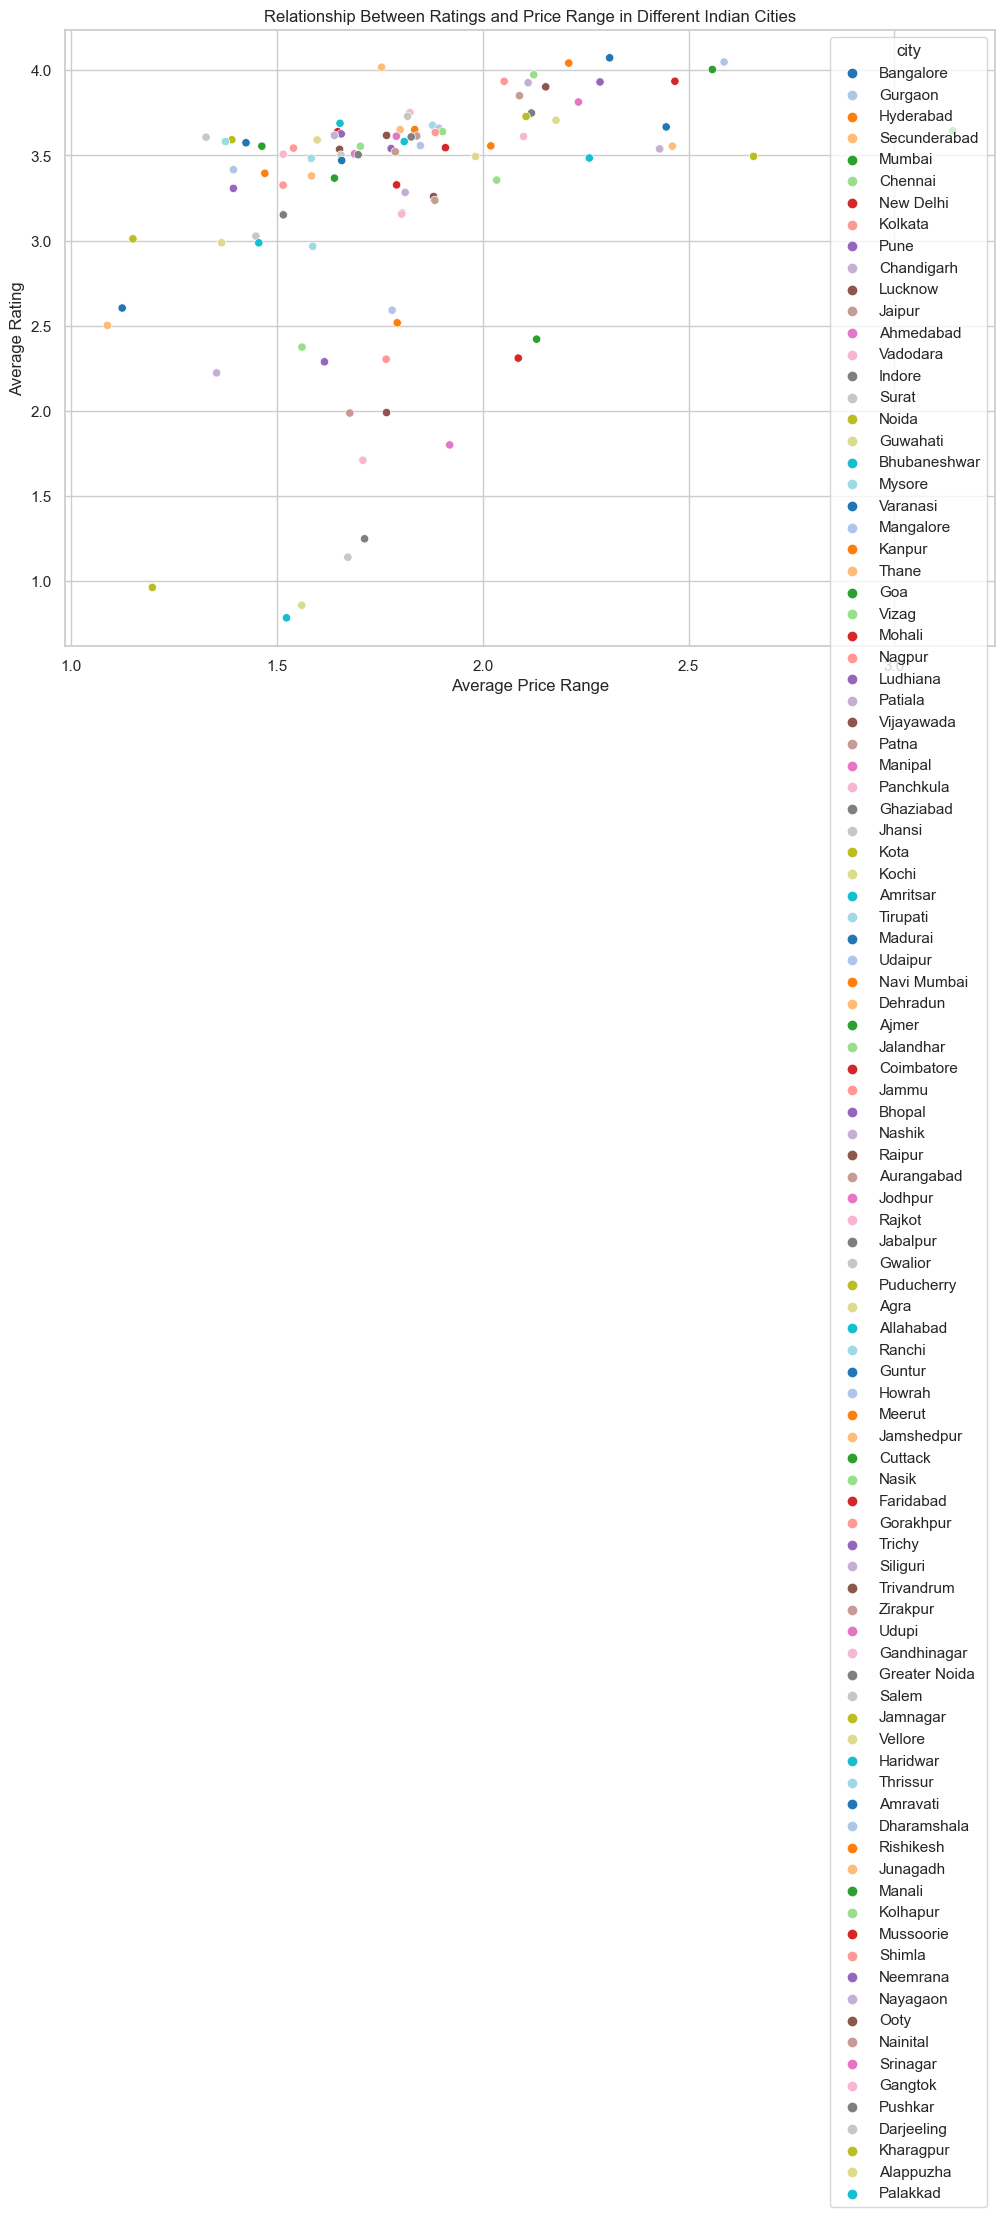

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=city_rating_price, x='avg_price_range', y='avg_rating', hue=city_rating_price.index, palette='tab20')
plt.title("Relationship Between Ratings and Price Range in Different Indian Cities")
plt.xlabel("Average Price Range")
plt.ylabel("Average Rating")
plt.show()  # Display the plot

In [ ]:
# Customer Preference Analysis by cuisine and price

In [ ]:
# Create a count of unique cuisines across all cities to identify the most popular ones

In [30]:
cuisine_count = df['cuisines'].str.split(',').explode().str.strip().value_counts().head(10)

In [31]:
print(cuisine_count)

cuisines
North Indian    85965
Chinese         57989
Fast Food       48584
South Indian    28895
Continental     26126
Beverages       24382
Cafe            23140
Desserts        21437
Italian         20920
Biryani         18315
Name: count, dtype: int64


In [ ]:
# Create a bar plot for the most popular cuisines across India

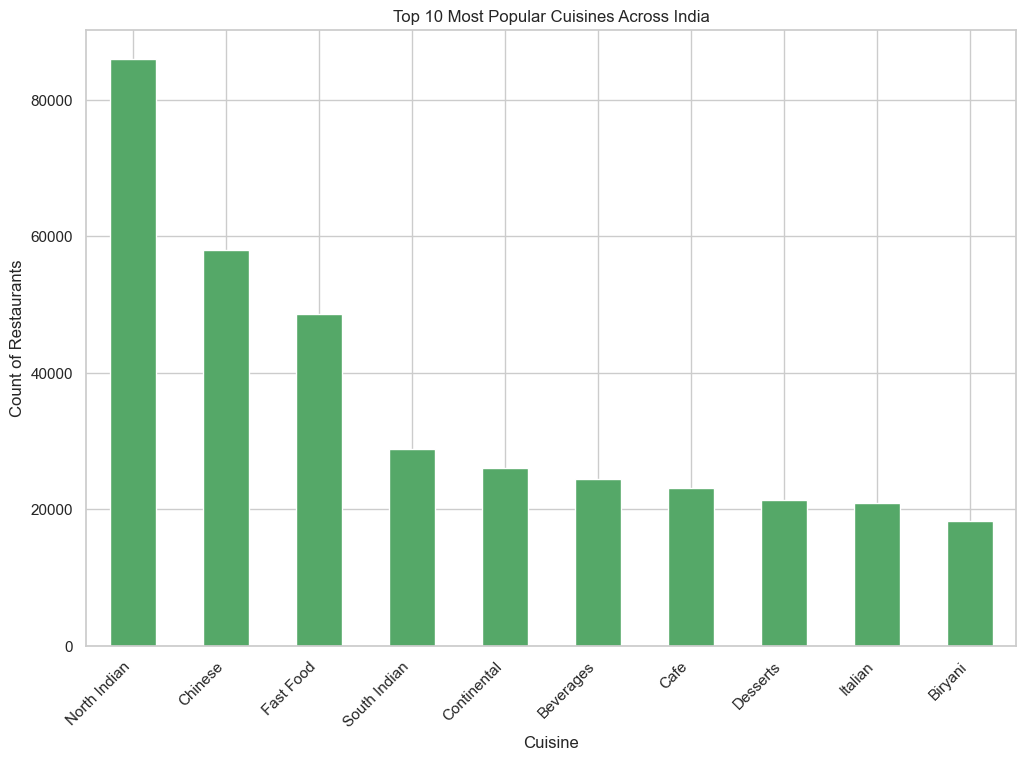

In [32]:
plt.figure(figsize=(12, 8))
cuisine_count.plot(kind='bar', color='g')
plt.title("Top 10 Most Popular Cuisines Across India")
plt.xlabel("Cuisine")
plt.ylabel("Count of Restaurants")
plt.xticks(rotation=45, ha='right')
plt.show()  # Display the plot

In [ ]:
# Examine the relationship between restaurant ratings and price range

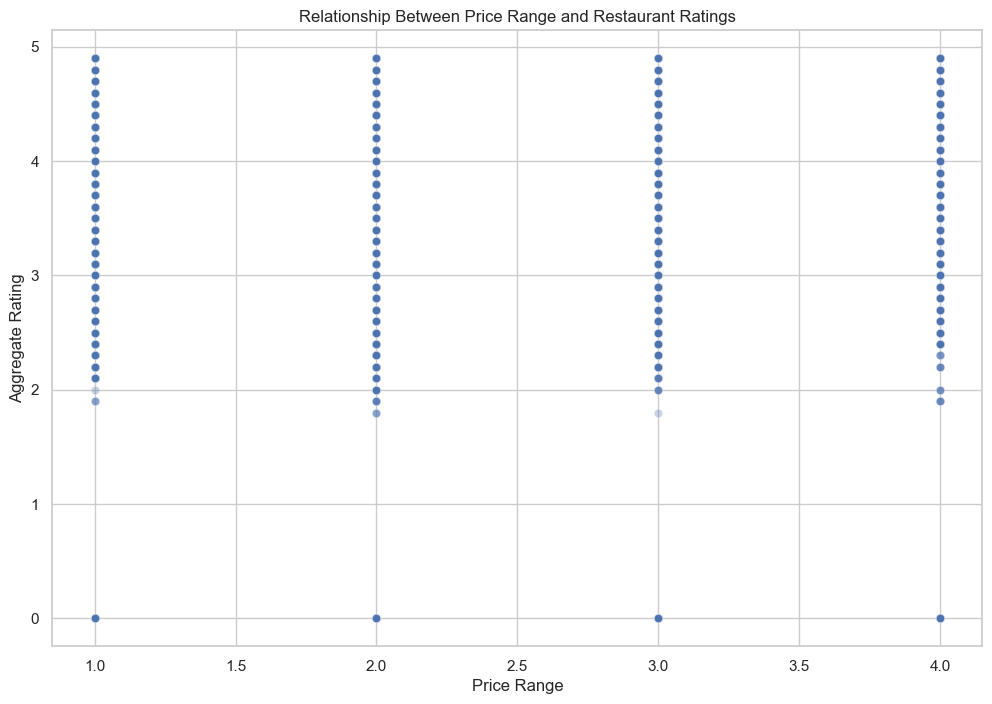

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='price_range', y='aggregate_rating', alpha=0.3)
plt.title("Relationship Between Price Range and Restaurant Ratings")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.show()  # Display the plot

In [ ]:
# Analyze the relationship between price range and restaurant ratings

In [35]:
price_rating_correlation = df[['price_range', 'aggregate_rating']].corr()

In [36]:
print(price_rating_correlation)

                  price_range  aggregate_rating
price_range          1.000000          0.252301
aggregate_rating     0.252301          1.000000


In [ ]:
# Examine the relationship between restaurant ratings and popularity (number of votes)

In [37]:
rating_popularity_correlation = df[['aggregate_rating', 'votes']].corr()



In [38]:
print(rating_popularity_correlation)

                  aggregate_rating     votes
aggregate_rating          1.000000  0.271953
votes                     0.271953  1.000000


In [ ]:
#Competitive Analysis

In [ ]:
# Identify major competitors by city and cuisine

In [25]:
competitors_by_cuisine = df['cuisines'].value_counts()

In [26]:
print(competitors_by_cuisine)

cuisines
North Indian                                            15996
Fast Food                                                6721
Cafe                                                     6190
North Indian, Chinese                                    5820
South Indian                                             5217
                                                        ...  
North Indian, Chinese, Continental, Healthy Food            1
Mughlai, North Indian, Chinese, Continental, Italian        1
Burger, Rolls, Fast Food                                    1
Fast Food, Chinese, Burger                                  1
North Indian, Lucknowi, Chinese                             1
Name: count, Length: 9382, dtype: int64


In [ ]:
# Example: Find the top-rated restaurants and their cuisines

In [17]:
top_rated_restaurants = df[df['aggregate_rating'] >= 4.5]['cuisines'].value_counts()

In [21]:
print(top_rated_restaurants )

cuisines
North Indian                                    826
South Indian                                    278
Cafe                                            256
Street Food                                     212
North Indian, Chinese                           188
                                               ... 
Modern Indian, Asian, Continental                 1
North Indian, European, Continental               1
Asian, BBQ, Seafood, Chinese                      1
North Indian, Italian, South Indian, Chinese      1
North Indian, Chinese, Pizza                      1
Name: count, Length: 891, dtype: int64


In [ ]:
#Market Gap Analysis

In [ ]:
# Count the number of restaurants for each cuisine

In [10]:
cuisine_counts = df['cuisines'].value_counts()

In [11]:
print(cuisine_counts )

cuisines
North Indian                                            15996
Fast Food                                                6721
Cafe                                                     6190
North Indian, Chinese                                    5820
South Indian                                             5217
                                                        ...  
North Indian, Chinese, Continental, Healthy Food            1
Mughlai, North Indian, Chinese, Continental, Italian        1
Burger, Rolls, Fast Food                                    1
Fast Food, Chinese, Burger                                  1
North Indian, Lucknowi, Chinese                             1
Name: count, Length: 9382, dtype: int64


In [ ]:
# Set a threshold to identify underrepresented cuisines

In [12]:
threshold = 10

In [ ]:
# Find underrepresented cuisines

In [13]:
underrepresented_cuisines = cuisine_counts[cuisine_counts < threshold]

In [14]:
print(underrepresented_cuisines)

cuisines
North Indian, Chinese, Beverages, Sandwich, Rolls, Desserts                 9
Kerala, Biryani, Chinese, Beverages                                         9
Fast Food, Ice Cream, Desserts                                              9
Cafe, Continental, Sandwich, Fast Food, Burger, Lebanese, Mughlai, Pizza    9
Belgian                                                                     9
                                                                           ..
North Indian, Chinese, Continental, Healthy Food                            1
Mughlai, North Indian, Chinese, Continental, Italian                        1
Burger, Rolls, Fast Food                                                    1
Fast Food, Chinese, Burger                                                  1
North Indian, Lucknowi, Chinese                                             1
Name: count, Length: 6334, dtype: int64


In [ ]:
# Create a bar plot for underrepresented cuisines

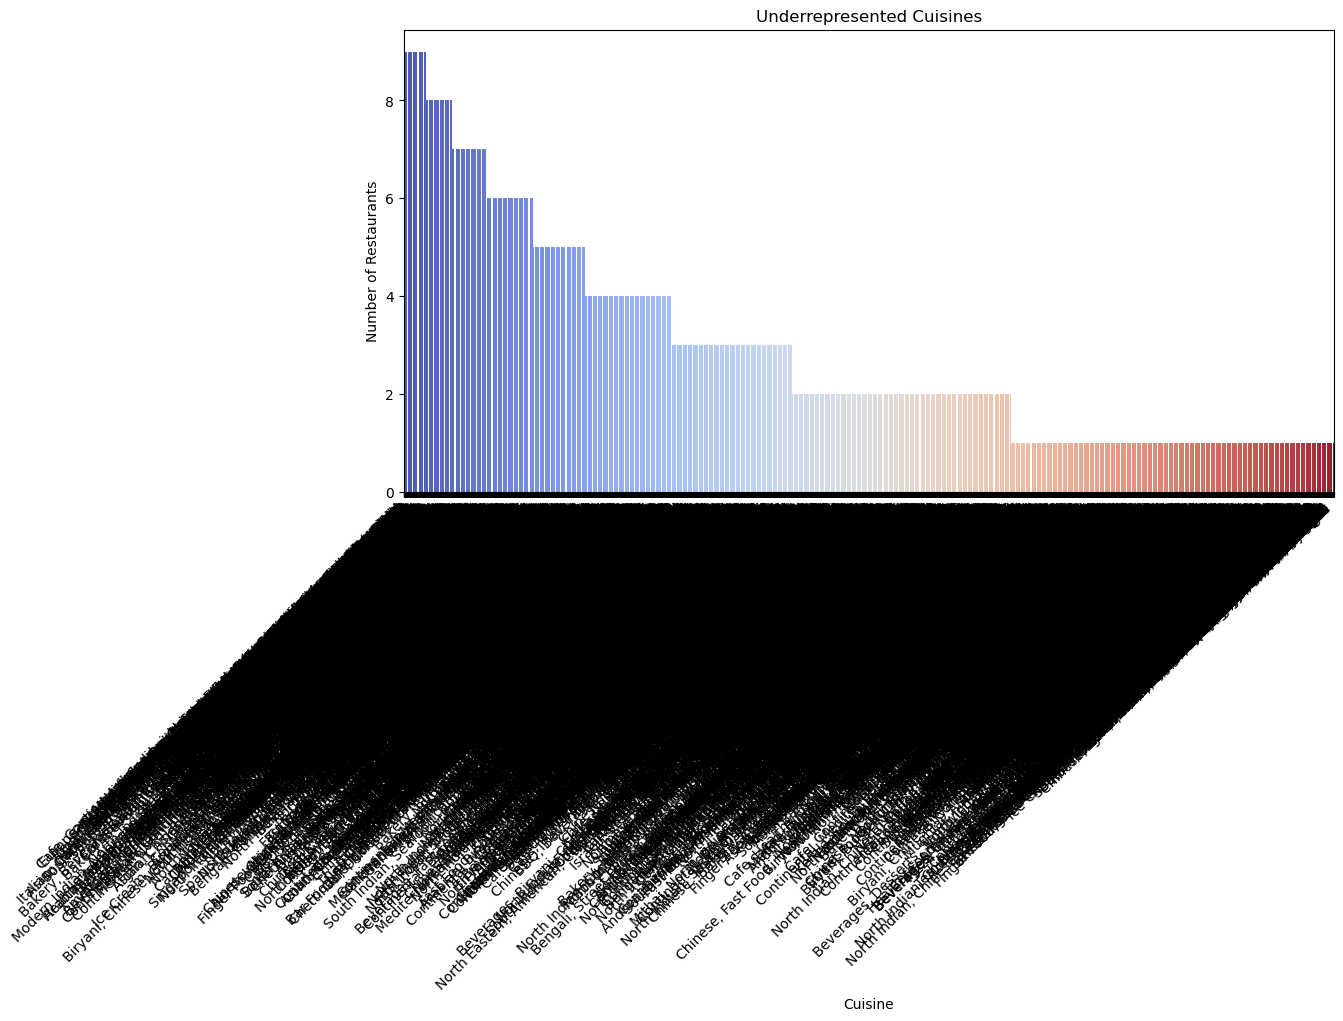

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x=underrepresented_cuisines.index, y=underrepresented_cuisines.values, palette='coolwarm')
plt.title('Underrepresented Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#underrepresented  price ranges


In [ ]:
# Count the number of restaurants for each price range

In [32]:
price_range_counts = df['price_range'].value_counts()

In [33]:
print(price_range_counts)

price_range
1    85831
2    77762
3    35767
4    12584
Name: count, dtype: int64


In [ ]:
# Set a threshold to identify underrepresented price ranges

In [34]:
price_range_threshold = 5 

In [ ]:
# Find underrepresented price ranges

In [35]:
underrepresented_price_ranges = price_range_counts[price_range_counts < price_range_threshold]